<a href="https://colab.research.google.com/github/hjaelee01/Introduction-to-Computation/blob/main/Korean_President_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# Install mkl to detour the issues related to OpenBLAS
# ("OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.")
!pip install mkl

In [ ]:
import sys
print(sys.executable)

/usr/bin/python3


In [ ]:
!pip install --no-deps fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.1 MB/s eta 0:00:00


In [ ]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
# Create parent directory: 'Texts' and children directories: 'Korean', 'Japanese', 'English'.
# In each children directory, download images of respective term.
presidents = ['Lee Myung Bak', 'Park Geun Hye', 'Moon Jae In', 'Yoon Suk Yeol']
path = Path('Presidents')
if not path.exists():
    path.mkdir()
    for o in presidents:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        url_list = search_images_ddg(f'{o}', max_images=40)
        download_images(dest, urls=url_list)


In [ ]:
# image_files saves all images of the parent directory.
image_files = get_image_files(path)
image_files

(#148) [Path('Presidents/Yoon Suk Yeol/28797149-b0c5-4bec-b26c-310422b2b093.jpg'),Path('Presidents/Yoon Suk Yeol/859592f8-2c9c-48f7-931e-e61eca6d9bd0.jpg'),Path('Presidents/Yoon Suk Yeol/877c3b72-68ae-40d5-935e-c8c2d17c6292.jpg'),Path('Presidents/Yoon Suk Yeol/75a93510-53d0-4437-a744-422b77bc4cc7.png'),Path('Presidents/Yoon Suk Yeol/d851f0a8-6268-41e0-b7df-9aa0055d5957.jpg'),Path('Presidents/Yoon Suk Yeol/1bb9f499-9a56-450e-a8c9-e5db35f6c859.jpg'),Path('Presidents/Yoon Suk Yeol/5f4392f9-51b5-4e3b-bf88-2b398c3fce11.jpg'),Path('Presidents/Yoon Suk Yeol/6dda79c4-33b8-4ed4-bc04-8d9334a0e547.jpg'),Path('Presidents/Yoon Suk Yeol/5581d25e-84e5-4c0e-8fbf-f4c290d9b9a3.jpg'),Path('Presidents/Yoon Suk Yeol/4edabe87-d25d-4fc6-8908-d83d84decc2b.png')...]

In [ ]:
len(image_files)

148

In [ ]:
# Print unverified images.
unverified = verify_images(image_files)
unverified

(#6) [Path('Presidents/Yoon Suk Yeol/faaa48c8-c2d3-42c0-9f3d-59a815494a93.jpg'),Path('Presidents/Yoon Suk Yeol/b369601b-ee7d-4970-a93c-99c17f229182.jpg'),Path('Presidents/Lee Myung Bak/6a55097c-afa3-4218-9d57-2d546117e6b7.jpeg'),Path('Presidents/Moon Jae In/8bf98e9d-9594-48f9-a1fd-8caab30f5dd5.jpg'),Path('Presidents/Park Geun Hye/f145ef95-45b4-4bfa-a7bc-fa5d81f0b5ad.jpg'),Path('Presidents/Park Geun Hye/da7a2f49-b79d-451c-91b2-7f1561360340.jpg')]

In [ ]:
# Remove unverified images from Path.
unverified.map(Path.unlink)

(#6) [None,None,None,None,None,None]

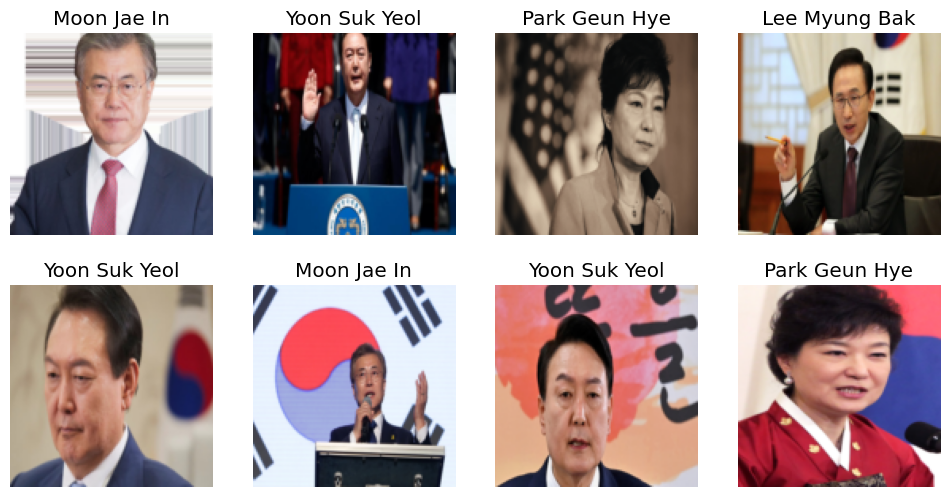

In [ ]:
# Create DataBlock and load it in DataLoaders.
# The dataloaders will finally be used to train a model.
presidents = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=0),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(128, min_scale=0.2)
)
dls = presidents.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

In [ ]:
# Train a model
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 101MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.698455,2.561678,0.785714,00:09


epoch,train_loss,valid_loss,error_rate,time
0,2.428849,2.304914,0.785714,00:17
1,2.115359,2.160533,0.678571,00:18
2,2.146223,2.164049,0.714286,00:13
3,2.071292,2.091938,0.678571,00:14


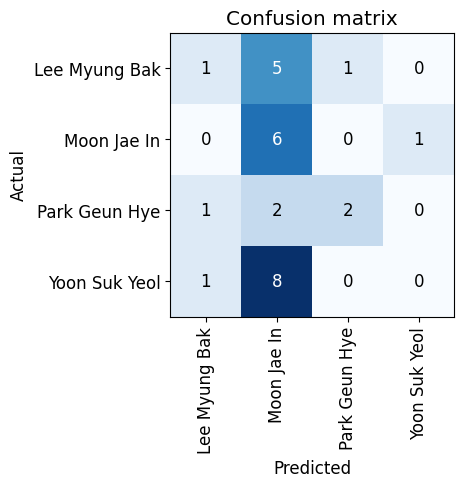

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

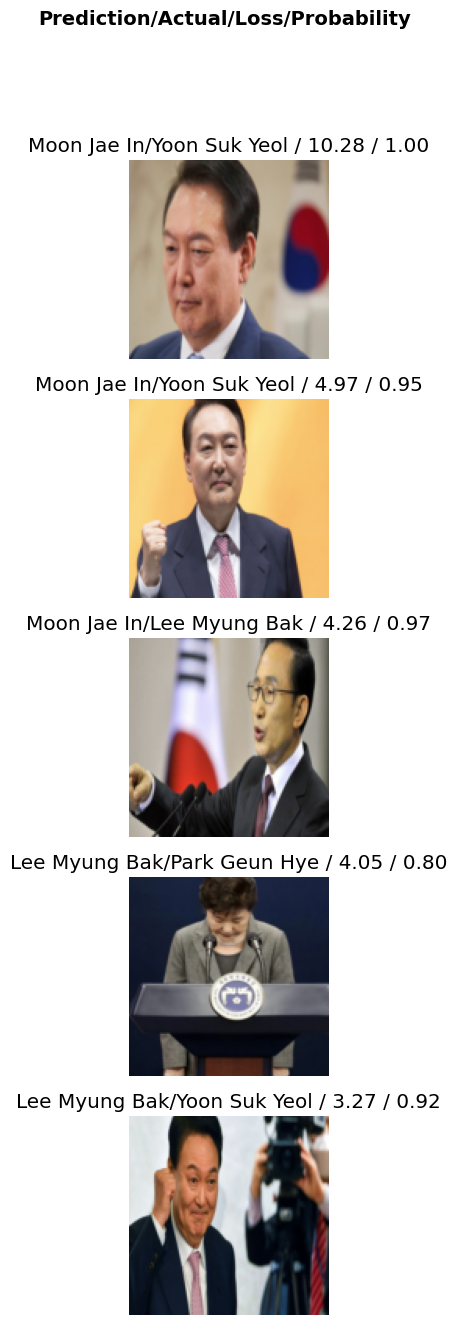

In [ ]:
interp.plot_top_losses(5, nrows=5)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
path = Path('Presidents/Lee Myung Bak')
learn_inf.predict(f'{path}/3e66a6d7-b85d-4308-9459-861b4f2d2e25.jpg')

('Moon Jae In', tensor(1), tensor([0.3279, 0.6657, 0.0028, 0.0036]))

In [ ]:
!git clone https://huggingface.co/spaces/hjaelee/Korean-President-Image-Classifier

In [ ]:
!cd Korean-President-Image-Classifier
!echo $PATH
!nano code.

In [ ]:
# prompt: In bash environment, in current directory, open the code.

nano code.py